<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

### Perceptron Classifier With MaxAbsScaler And Power Transformer

This Code template illustrates the Classification task using simple Perceptron. The algorithm is a two-class (binary) classification machine learning algorithm. Code also includes the feature rescaling technique MaxAbsScaler and the feature transformation technique PowerTransformer in a pipeline. 

### Required Packages

In [ ]:
!pip install imblearn

In [1]:
import warnings 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as se 
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, MaxAbsScaler, PowerTransformer
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report,plot_confusion_matrix
warnings.filterwarnings('ignore')

### Initialization

Filepath of CSV file

In [32]:
#filepath
file_path= ""

List of features which are  required for model training .

In [33]:
#x_values
features=[]

Target feature for prediction.

In [34]:
#y_value
target=''

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [35]:
df=pd.read_csv(file_path)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [36]:
X = df[features]
Y = df[target]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [37]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)
def EncodeY(df):
    if len(df.unique())<=2:
        return df
    else:
        un_EncodedT=np.sort(pd.unique(df), axis=-1, kind='mergesort')
        df=LabelEncoder().fit_transform(df)
        EncodedT=[xi for xi in range(len(un_EncodedT))]
        print("Encoded Target: {} to {}".format(un_EncodedT,EncodedT))
        return df

In [38]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])  
X=EncodeX(X)
Y=EncodeY(NullClearner(Y))
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0
1,608,41,1,83807.86,1,0,1,112542.58,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0
4,850,43,2,125510.82,1,1,1,79084.10,1,0


#### Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

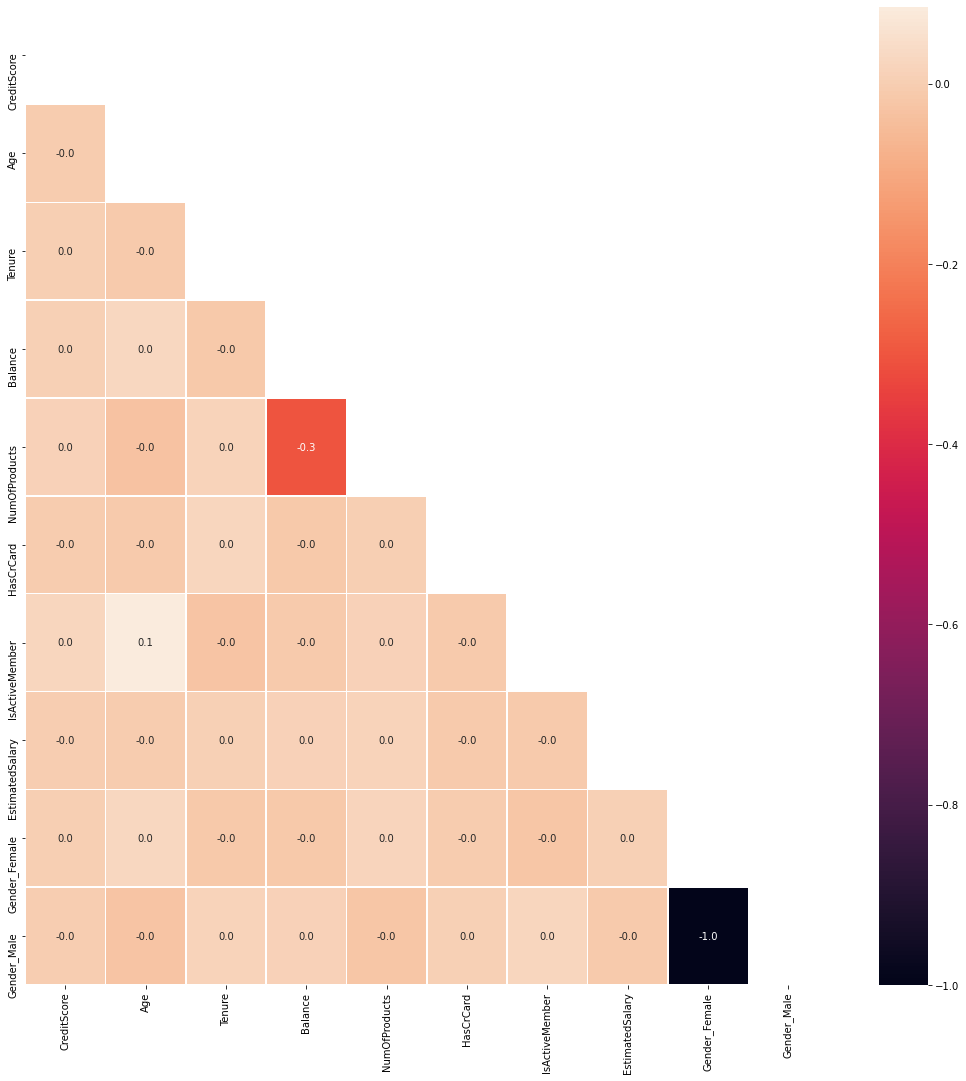

In [39]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

#### Distribution Of Target Variable

<AxesSubplot:xlabel='Exited', ylabel='count'>

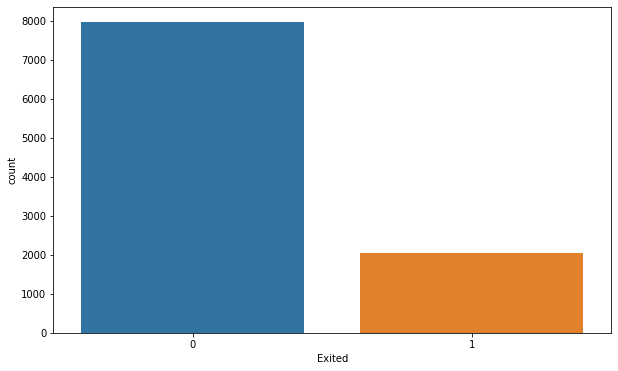

In [40]:
plt.figure(figsize = (10,6))
se.countplot(Y)

### Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [41]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

#### Handling Target Imbalance

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class.We will perform overspampling using imblearn library. 

In [42]:
x_train,y_train = RandomOverSampler(random_state=123).fit_resample(x_train, y_train)

### Data Rescaling

Scale each feature by its maximum absolute value.

This estimator scales and translates each feature individually such that the maximal absolute value of each feature in the training set will be 1.0. It does not shift/center the data, and thus does not destroy any sparsity.

[More on MaxAbsScaler module and parameters](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)

### Feature Transformation

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

[More on PowerTransformer module and parameters](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html)

### Model
 the perceptron is an algorithm for supervised learning of binary classifiers.
 The algorithm learns the weights for the input signals in order to draw a linear decision boundary.This enables you to distinguish between the two linearly separable classes +1 and -1.
#### Model Tuning Parameters

> **penalty** ->The penalty (aka regularization term) to be used. {‘l2’,’l1’,’elasticnet’}

> **alpha** -> Constant that multiplies the regularization term if regularization is used.

> **l1_ratio** -> The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1. l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1. Only used if penalty='elasticnet'.

> **tol** -> The stopping criterion. If it is not None, the iterations will stop when (loss > previous_loss - tol).

> **early_stopping**-> Whether to use early stopping to terminate training when validation. score is not improving. If set to True, it will automatically set aside a stratified fraction of training data as validation and terminate training when validation score is not improving by at least tol for n_iter_no_change consecutive epochs.

> **validation_fraction** -> The proportion of training data to set aside as validation set for early stopping. Must be between 0 and 1. Only used if early_stopping is True.

> **n_iter_no_change** -> Number of iterations with no improvement to wait before early stopping.

In [43]:
# Build Model here
model = make_pipeline(MaxAbsScaler(), PowerTransformer(), Perceptron(random_state=123))
model.fit(x_train, y_train)

Pipeline(steps=[('maxabsscaler', MaxAbsScaler()),
                ('powertransformer', PowerTransformer()),
                ('perceptron', Perceptron(random_state=123))])

#### Model Accuracy

score() method return the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

In [44]:
print("Accuracy score {:.2f} %\n".format(model.score(x_test,y_test)*100))

Accuracy score 58.00 %



#### Confusion Matrix

A confusion matrix is utilized to understand the performance of the classification model or algorithm in machine learning for a given test set where results are known.

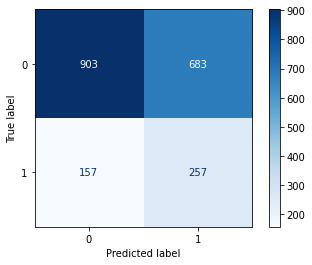

In [45]:
plot_confusion_matrix(model,x_test,y_test,cmap=plt.cm.Blues)

#### Classification Report
A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True, how many are False.

* **where**:
    - Precision:- Accuracy of positive predictions.
    - Recall:- Fraction of positives that were correctly identified.
    - f1-score:-  percent of positive predictions were correct
    - support:- Support is the number of actual occurrences of the class in the specified dataset.

In [46]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.85      0.57      0.68      1586
           1       0.27      0.62      0.38       414

    accuracy                           0.58      2000
   macro avg       0.56      0.60      0.53      2000
weighted avg       0.73      0.58      0.62      2000



#### Creator: Nikhil Shrotri , Github: [Profile](https://github.com/nikhilshrotri)
